
# ***Partition based: K-means***







## IRIS PLANT DATASET

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()   #loading iris dataset from sklearn.datasets
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
df=pd.DataFrame(data=iris.data, columns=['sepal length','sepal width','petal length','petal width'])
df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
x=iris.data

Text(0, 0.5, 'Sepal length')

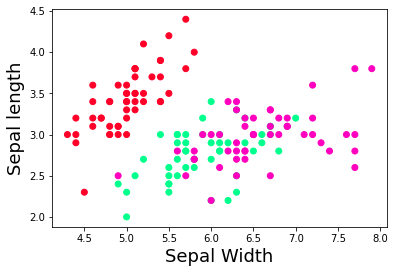

In [5]:
plt.scatter(x=df['sepal length'], y=df['sepal width'] ,c=iris.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Sepal length', fontsize=18)

In [6]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)
y = kmeans.fit_predict(x)

In [7]:
print("K-Means Cluster Centers")
print(kmeans.cluster_centers_)
print("Cluster Labels")
print(kmeans.labels_)

K-Means Cluster Centers
[[5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
Cluster Labels
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


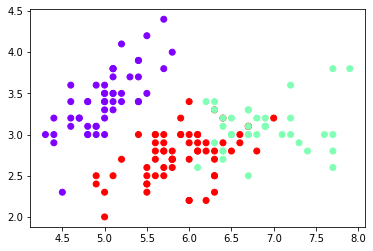

In [8]:
plt.scatter(x=df['sepal length'], y=df['sepal width'] ,c=kmeans.labels_, cmap='rainbow') #try using cmap='rainbow'
plt.show()

Text(0.5, 1.0, 'Predicted')

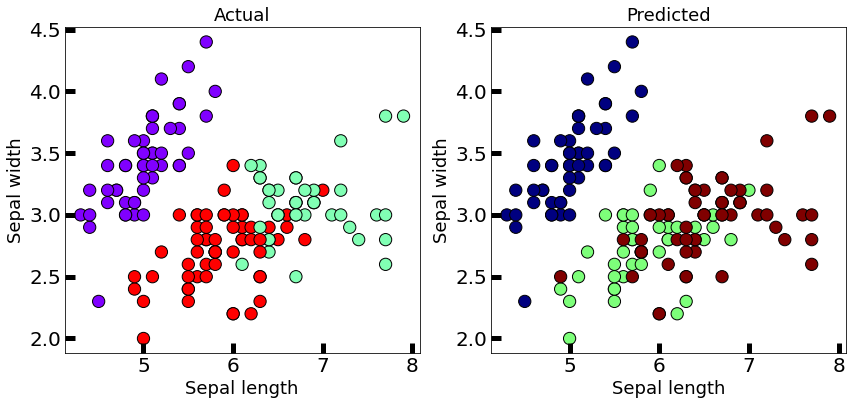

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['sepal length'], y=df['sepal width'], c=y, cmap='rainbow',edgecolor='k', s=150) #you can also try cmap='rainbow'
axes[1].scatter(x=df['sepal length'], y=df['sepal width'], c=iris.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)


In [10]:
from sklearn.metrics import silhouette_score
print("The silhouette score is :")
silhouette_score(x, kmeans.labels_)

The silhouette score is :


0.5528190123564091

In [11]:
from sklearn.metrics import calinski_harabasz_score
print("The calinski harabasz score is :")
calinski_harabasz_score(x, kmeans.labels_)

The calinski harabasz score is :


561.62775662962

In [12]:
from sklearn.metrics import davies_bouldin_score
print("The davies bouldin score is :")
davies_bouldin_score(x, kmeans.labels_)

The davies bouldin score is :


0.6619715465007511

In [13]:
print("It is observed that TSS=SSE+SSB is a constant. Hence we will calculate the TSS ans substract SSE from it to get SSB")

print("The value of SSE is: ")
print(kmeans.inertia_)



# Finding the overall centroid of the data points
centers = kmeans.cluster_centers_
center_x = []
for center in centers:
  center_x.append(center[0])
center_x
overall_center = sum(center_x)/len(center_x)

tss = 0
for i in range(len(df)):
  a = df.iloc[i][0] - overall_center
  b = pow(a,2)
  tss = tss+b



print("The value of SSB is: ")
print(tss - kmeans.inertia_)

It is observed that TSS=SSE+SSB is a constant. Hence we will calculate the TSS ans substract SSE from it to get SSB
The value of SSE is: 
78.85144142614601
The value of SSB is: 
24.18035246910202


## WINE DATASET

In [14]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine

In [15]:
wine=load_wine()   #loading iris dataset from sklearn.datasets
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [16]:
x=wine.data

In [17]:
df=pd.DataFrame(data=wine.data, columns=['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Text(0, 0.5, 'malic_acid')

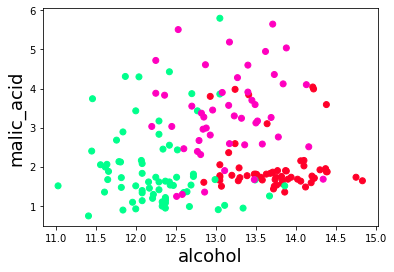

In [18]:
plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=wine.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('alcohol', fontsize=18)
plt.ylabel('malic_acid', fontsize=18)

In [19]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)
y = kmeans.fit_predict(x)

In [20]:
print("K-Means Cluster Centers")
print(kmeans.cluster_centers_)
print("Cluster Labels")
print(kmeans.labels_)

K-Means Cluster Centers
[[1.25166667e+01 2.49420290e+00 2.28855072e+00 2.08231884e+01
  9.23478261e+01 2.07072464e+00 1.75840580e+00 3.90144928e-01
  1.45188406e+00 4.08695651e+00 9.41159420e-01 2.49072464e+00
  4.58231884e+02]
 [1.29298387e+01 2.50403226e+00 2.40806452e+00 1.98903226e+01
  1.03596774e+02 2.11112903e+00 1.58403226e+00 3.88387097e-01
  1.50338710e+00 5.65032258e+00 8.83967742e-01 2.36548387e+00
  7.28338710e+02]
 [1.38044681e+01 1.88340426e+00 2.42617021e+00 1.70234043e+01
  1.05510638e+02 2.86723404e+00 3.01425532e+00 2.85319149e-01
  1.91042553e+00 5.70255319e+00 1.07829787e+00 3.11404255e+00
  1.19514894e+03]]
Cluster Labels
[2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 1 1 2 2 1 2 2 2 2 2 2 1 1
 2 2 1 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 0 0 1 0 0 1 1 1 0 0 2
 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1
 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0

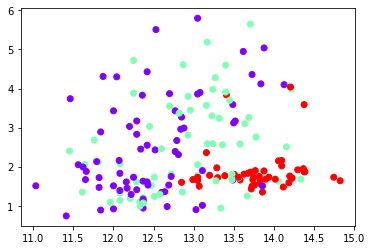

In [ ]:
plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=kmeans.labels_, cmap='rainbow') #try using cmap='rainbow'
plt.show()

Text(0.5, 1.0, 'Predicted')

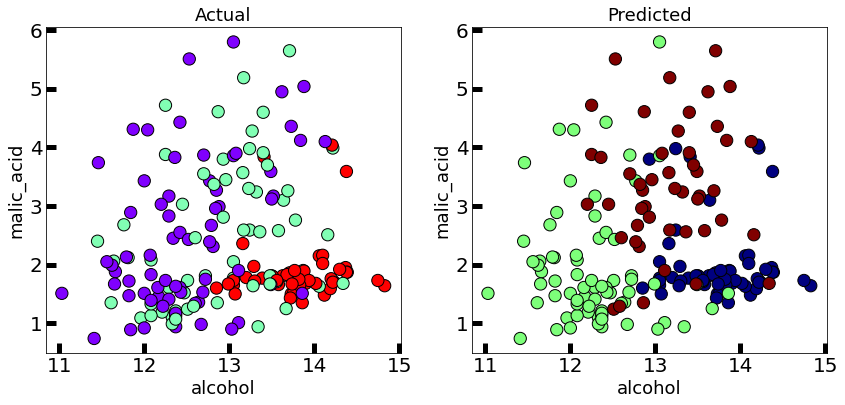

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['alcohol'], y=df['malic_acid'], c=y, cmap='rainbow',edgecolor='k', s=150) #you can also try cmap='rainbow'
axes[1].scatter(x=df['alcohol'], y=df['malic_acid'], c=wine.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('alcohol', fontsize=18)
axes[0].set_ylabel('malic_acid', fontsize=18)
axes[1].set_xlabel('alcohol', fontsize=18)
axes[1].set_ylabel('malic_acid', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)


In [22]:
from sklearn.metrics import silhouette_score
print("The silhouette score is :")
silhouette_score(x, kmeans.labels_)

The silhouette score is :


0.5711381937868844

In [23]:
from sklearn.metrics import calinski_harabasz_score
print("The calinski harabasz score is :")
calinski_harabasz_score(x, kmeans.labels_)

The calinski harabasz score is :


561.815657860671

In [24]:
from sklearn.metrics import davies_bouldin_score
print("The davies bouldin score is :")
davies_bouldin_score(x, kmeans.labels_)

The davies bouldin score is :


0.5342431775436273

In [25]:
print("It is observed that TSS=SSE+SSB is a constant. Hence we will calculate the TSS ans substract SSE from it to get SSB")

print("The value of SSE is: ")
print(kmeans.inertia_)



# Finding the overall centroid of the data points
centers = kmeans.cluster_centers_
center_x = []
for center in centers:
  center_x.append(center[0])
center_x
overall_center = sum(center_x)/len(center_x)

tss = 0
for i in range(len(df)):
  a = df.iloc[i][0] - overall_center
  b = pow(a,2)
  tss = tss+b



print("The value of SSB is: ")
print(tss - kmeans.inertia_)

It is observed that TSS=SSE+SSB is a constant. Hence we will calculate the TSS ans substract SSE from it to get SSB
The value of SSE is: 
2370689.686782968
The value of SSB is: 
-2370571.8053313834



# ***Partition based: K-medoids***

## IRIS PLANT DATASET

In [26]:
#importing libraries
!pip install scikit-learn-extra
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import load_iris


     |████████████████████████████████| 1.7 MB 4.2 MB/s 
     |████████████████████████████████| 23.2 MB 132 kB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [27]:
iris=load_iris()   #loading iris dataset from sklearn.datasets
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [28]:
df=pd.DataFrame(data=iris.data, columns=['sepal length','sepal width','petal length','petal width'])
df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
x=iris.data

Text(0, 0.5, 'Sepal length')

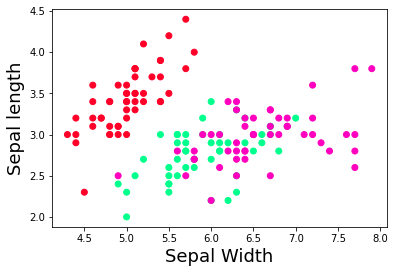

In [30]:
plt.scatter(x=df['sepal length'], y=df['sepal width'] ,c=iris.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Sepal length', fontsize=18)

In [31]:
kmedoid = KMedoids(init="heuristic", n_clusters=3, max_iter=300, random_state=42)
y = kmedoid.fit_predict(x)

In [32]:
print("K-Medoids Cluster Centers")
print(kmedoid.cluster_centers_)
print("Cluster Labels")
print(kmedoid.labels_)

K-Medoids Cluster Centers
[[6.5 3.  5.2 2. ]
 [5.7 2.8 4.1 1.3]
 [5.  3.4 1.5 0.2]]
Cluster Labels
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


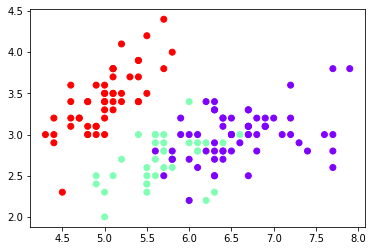

In [33]:
plt.scatter(x=df['sepal length'], y=df['sepal width'] ,c=kmedoid.labels_, cmap='rainbow') #try using cmap='rainbow'
plt.show()

Text(0.5, 1.0, 'Predicted')

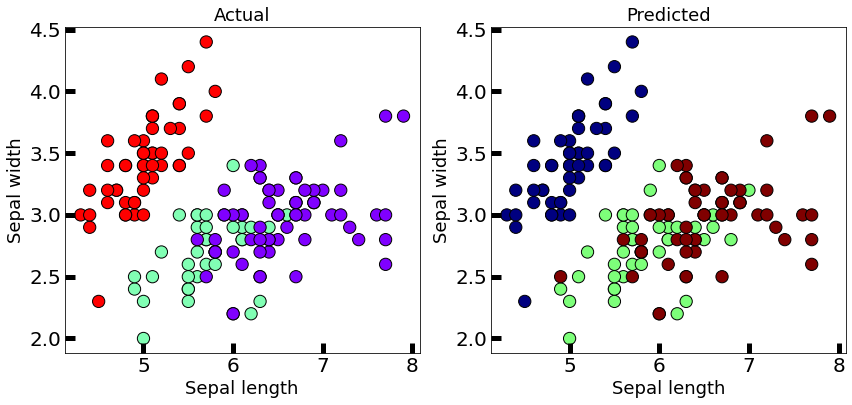

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['sepal length'], y=df['sepal width'], c=y, cmap='rainbow',edgecolor='k', s=150) #you can also try cmap='rainbow'
axes[1].scatter(x=df['sepal length'], y=df['sepal width'], c=iris.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [35]:
from sklearn.metrics import silhouette_score
print("The silhouette score is :")
silhouette_score(x, kmedoid.labels_)

The silhouette score is :


0.5201984013106979

In [36]:

from sklearn.metrics import calinski_harabasz_score
print("The calinski harabasz score is :")
calinski_harabasz_score(x, kmedoid.labels_)

The calinski harabasz score is :


521.5609065033622

In [37]:
from sklearn.metrics import davies_bouldin_score
print("The davies bouldin score is :")
davies_bouldin_score(x, kmedoid.labels_)

The davies bouldin score is :


0.6686244410428932

In [38]:
print("It is observed that TSS=SSE+SSB is a constant. Hence we will calculate the TSS ans substract SSE from it to get SSB")

print("The value of SSE is: ")
print(kmedoid.inertia_)



# Finding the overall centroid of the data points
centers = kmedoid.cluster_centers_
center_x = []
for center in centers:
  center_x.append(center[0])
center_x
overall_center = sum(center_x)/len(center_x)

tss = 0
for i in range(len(df)):
  a = df.iloc[i][0] - overall_center
  b = pow(a,2)
  tss = tss+b



print("The value of SSB is: ")
print(tss - kmedoid.inertia_)

It is observed that TSS=SSE+SSB is a constant. Hence we will calculate the TSS ans substract SSE from it to get SSB
The value of SSE is: 
98.86857318335639
The value of SSB is: 
5.114760149976831


## WINE DATASET

In [39]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import load_iris

In [40]:
wine=load_wine()   #loading iris dataset from sklearn.datasets
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [41]:
x=wine.data

In [42]:

df=pd.DataFrame(data=wine.data, columns=['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Text(0, 0.5, 'malic_acid')

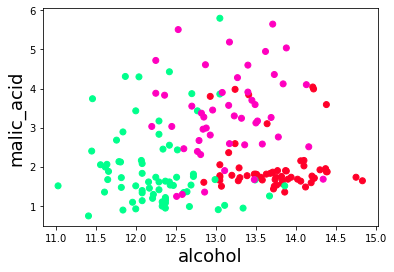

In [43]:
plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=wine.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('alcohol', fontsize=18)
plt.ylabel('malic_acid', fontsize=18)

In [44]:
kmedoid = KMedoids(init="heuristic", n_clusters=3, max_iter=300, random_state=42)
y = kmedoid.fit_predict(x)

In [45]:
print("K-Medoids Cluster Centers")
print(kmedoid.cluster_centers_)
print("Cluster Labels")
print(kmedoid.labels_)

K-Medoids Cluster Centers
[[1.260e+01 2.460e+00 2.200e+00 1.850e+01 9.400e+01 1.620e+00 6.600e-01
  6.300e-01 9.400e-01 7.100e+00 7.300e-01 1.580e+00 6.950e+02]
 [1.349e+01 1.660e+00 2.240e+00 2.400e+01 8.700e+01 1.880e+00 1.840e+00
  2.700e-01 1.030e+00 3.740e+00 9.800e-01 2.780e+00 4.720e+02]
 [1.383e+01 1.570e+00 2.620e+00 2.000e+01 1.150e+02 2.950e+00 3.400e+00
  4.000e-01 1.720e+00 6.600e+00 1.130e+00 2.570e+00 1.130e+03]]
Cluster Labels
[2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0
 2 2 0 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 1 0 1 1 0 0 0 1 1 2
 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 2 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0
 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1]


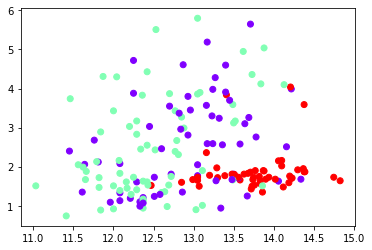

In [46]:
plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=kmedoid.labels_, cmap='rainbow') #try using cmap='rainbow'
plt.show()

Text(0.5, 1.0, 'Predicted')

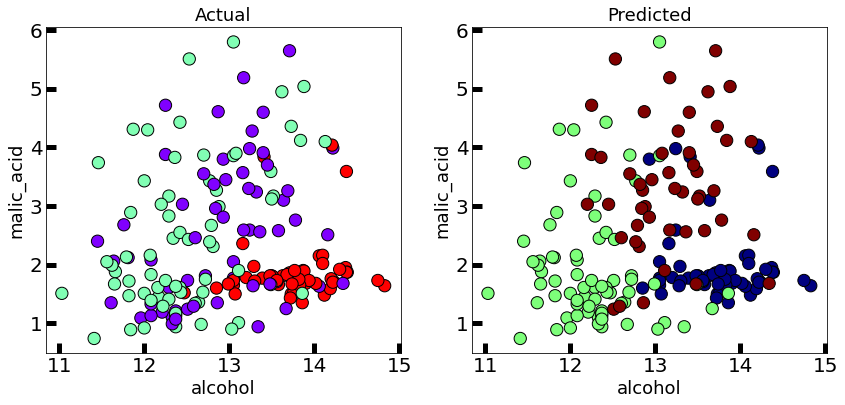

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['alcohol'], y=df['malic_acid'], c=y, cmap='rainbow',edgecolor='k', s=150) #you can also try cmap='rainbow'
axes[1].scatter(x=df['alcohol'], y=df['malic_acid'], c=wine.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('alcohol', fontsize=18)
axes[0].set_ylabel('malic_acid', fontsize=18)
axes[1].set_xlabel('alcohol', fontsize=18)
axes[1].set_ylabel('malic_acid', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [48]:
from sklearn.metrics import silhouette_score
print("The silhouette score is :")
silhouette_score(x, kmedoid.labels_)

The silhouette score is :


0.5666480408636575

In [49]:
from sklearn.metrics import calinski_harabasz_score
print("The calinski harabasz score is :")
calinski_harabasz_score(x, kmedoid.labels_)

The calinski harabasz score is :


539.3792353535451

In [50]:
from sklearn.metrics import davies_bouldin_score
print("The davies bouldin score is :")
davies_bouldin_score(x, kmedoid.labels_)

The davies bouldin score is :


0.529239412600317

In [51]:
print("It is observed that TSS=SSE+SSB is a constant. Hence we will calculate the TSS ans substract SSE from it to get SSB")

print("The value of SSE is: ")
print(kmedoid.inertia_)



# Finding the overall centroid of the data points
centers = kmedoid.cluster_centers_
center_x = []
for center in centers:
  center_x.append(center[0])
center_x
overall_center = sum(center_x)/len(center_x)

tss = 0
for i in range(len(df)):
  a = df.iloc[i][0] - overall_center
  b = pow(a,2)
  tss = tss+b



print("The value of SSB is: ")
print(tss - kmedoid.inertia_)

It is observed that TSS=SSE+SSB is a constant. Hence we will calculate the TSS ans substract SSE from it to get SSB
The value of SSE is: 
16376.969320536637
The value of SSB is: 
-16243.642776092192


# ***Hierarchical: Dendrogram***

## IRIS PLANT DATASET

In [52]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [53]:
iris=load_iris()   #loading iris dataset from sklearn.datasets
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [54]:
df=pd.DataFrame(data=iris.data, columns=['sepal length','sepal width','petal length','petal width'])
df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [55]:
x=iris.data

Text(0, 0.5, 'Sepal length')

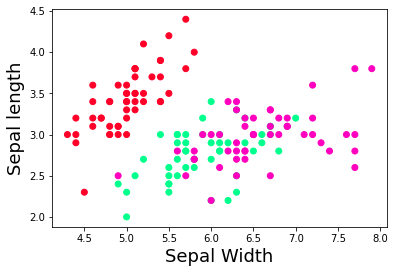

In [56]:
plt.scatter(x=df['sepal length'], y=df['sepal width'] ,c=iris.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Sepal length', fontsize=18)

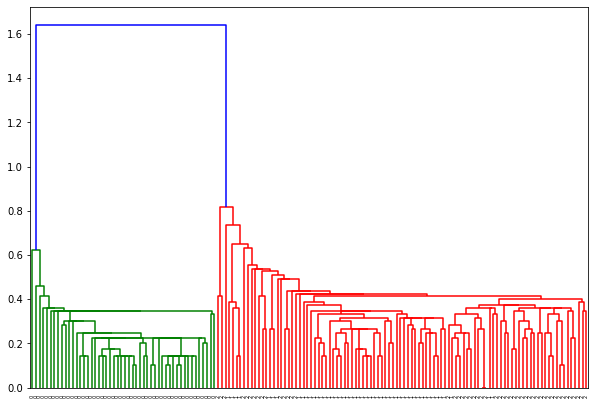

In [57]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(x, 'single')
plt.figure(figsize=(10,7))

dendrogram(linked,
           orientation='top',
           labels=iris.target,
           distance_sort='descending',
           show_leaf_counts=True)

plt.show()

## WINE DATASET

In [58]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine

In [59]:
wine=load_wine()   #loading iris dataset from sklearn.datasets
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [60]:
x=wine.data

In [61]:
df=pd.DataFrame(data=wine.data, columns=['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Text(0, 0.5, 'malic_acid')

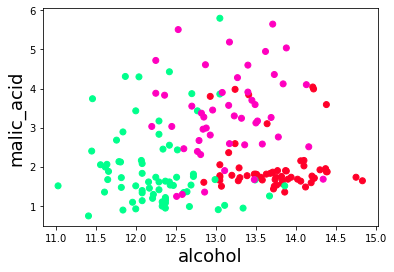

In [62]:
plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=wine.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('alcohol', fontsize=18)
plt.ylabel('malic_acid', fontsize=18)

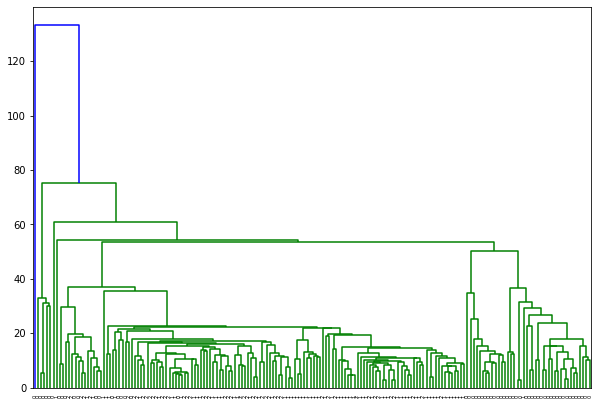

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(x, 'single')
plt.figure(figsize=(10,7))

dendrogram(linked,
           orientation='top',
           labels=wine.target,
           distance_sort='descending',
           show_leaf_counts=True)

plt.show()

# ***Hierarchical: AGNES***

## IRIS PLANT DATASET

In [64]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [65]:
iris=load_iris()   #loading iris dataset from sklearn.datasets
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [66]:
df=pd.DataFrame(data=iris.data, columns=['sepal length','sepal width','petal length','petal width'])
df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [67]:
x=iris.data


Text(0, 0.5, 'Sepal length')

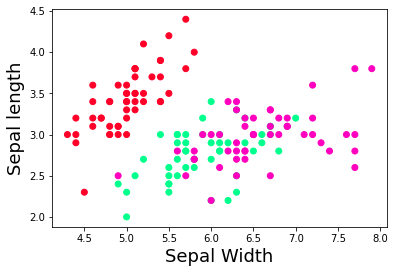

In [68]:
plt.scatter(x=df['sepal length'], y=df['sepal width'] ,c=iris.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Sepal length', fontsize=18)

In [69]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y = cluster.fit_predict(x)

In [70]:
print("Cluster labels:")
print(cluster.labels_)

Cluster labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


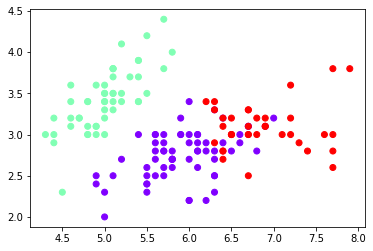

In [71]:
plt.scatter(x=df['sepal length'], y=df['sepal width'] ,c=cluster.labels_, cmap='rainbow') #try using cmap='rainbow'
plt.show()

Text(0.5, 1.0, 'Predicted')

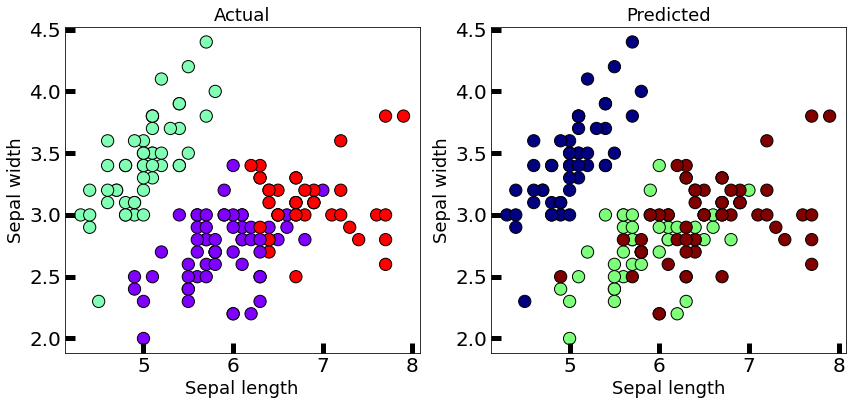

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['sepal length'], y=df['sepal width'], c=y, cmap='rainbow',edgecolor='k', s=150) #you can also try cmap='rainbow'
axes[1].scatter(x=df['sepal length'], y=df['sepal width'], c=iris.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [73]:
from sklearn.metrics import silhouette_score
print("The silhouette score is :")
silhouette_score(x, cluster.labels_)

The silhouette score is :


0.5543236611296415

In [74]:
from sklearn.metrics import calinski_harabasz_score
print("The calinski harabasz score is :")
calinski_harabasz_score(x, cluster.labels_)

The calinski harabasz score is :


558.0580408128307

In [75]:
from sklearn.metrics import davies_bouldin_score
print("The davies bouldin score is :")
davies_bouldin_score(x, cluster.labels_)

The davies bouldin score is :


0.6562564540642065

## WINE DATASET

In [76]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine

In [77]:
wine=load_wine()   #loading iris dataset from sklearn.datasets
wine


{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [78]:
x=wine.data

In [79]:
df=pd.DataFrame(data=wine.data, columns=['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'])
df


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Text(0, 0.5, 'malic_acid')

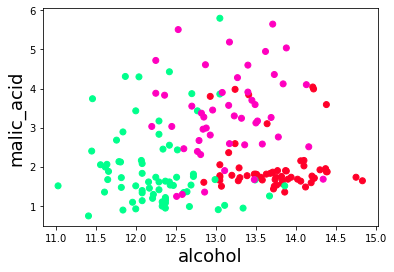

In [80]:
plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=wine.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('alcohol', fontsize=18)
plt.ylabel('malic_acid', fontsize=18)

In [81]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y = cluster.fit_predict(x)

In [82]:
print("Cluster Labels")
print(cluster.labels_)

Cluster Labels
[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 0 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]


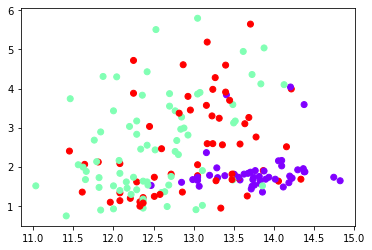

In [83]:
plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=cluster.labels_, cmap='rainbow') #try using cmap='rainbow'
plt.show()

Text(0.5, 1.0, 'Predicted')

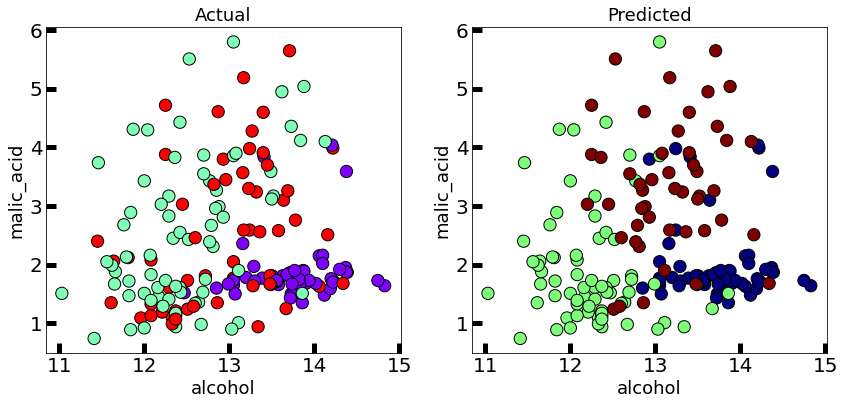

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['alcohol'], y=df['malic_acid'], c=y, cmap='rainbow',edgecolor='k', s=150) #you can also try cmap='rainbow'
axes[1].scatter(x=df['alcohol'], y=df['malic_acid'], c=wine.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('alcohol', fontsize=18)
axes[0].set_ylabel('malic_acid', fontsize=18)
axes[1].set_xlabel('alcohol', fontsize=18)
axes[1].set_ylabel('malic_acid', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [85]:
from sklearn.metrics import silhouette_score
print("The silhouette score is :")
silhouette_score(x, cluster.labels_)

The silhouette score is :


0.5644796401732074

In [86]:
from sklearn.metrics import calinski_harabasz_score
print("The calinski harabasz score is :")
calinski_harabasz_score(x, cluster.labels_)

The calinski harabasz score is :


552.851711505718

In [87]:
from sklearn.metrics import davies_bouldin_score
print("The davies bouldin score is :")
davies_bouldin_score(x, cluster.labels_)

The davies bouldin score is :


0.5357343073560216

# ***Hierarchical: BIRCH***

## IRIS PLANT DATASET

In [88]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [89]:
iris=load_iris()   #loading iris dataset from sklearn.datasets
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [90]:
df=pd.DataFrame(data=iris.data, columns=['sepal length','sepal width','petal length','petal width'])
df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [91]:
x=iris.data

Text(0, 0.5, 'Sepal length')

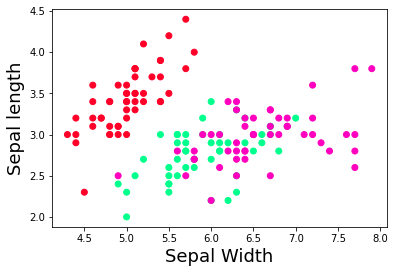

In [92]:
plt.scatter(x=df['sepal length'], y=df['sepal width'] ,c=iris.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Sepal length', fontsize=18)

In [93]:
from sklearn.cluster import Birch

birch = Birch(n_clusters=3, compute_labels=True, branching_factor=50)
y = birch.fit_predict(x)

In [94]:
print("Cluster Labels")
print(cluster.labels_)

Cluster Labels
[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 0 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]


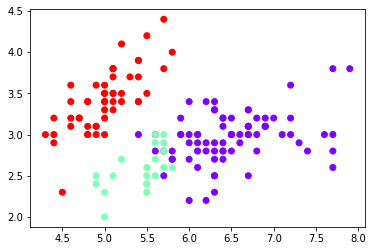

In [95]:
plt.scatter(x=df['sepal length'], y=df['sepal width'] ,c=birch.labels_, cmap='rainbow') #try using cmap='rainbow'
plt.show()

Text(0.5, 1.0, 'Predicted')

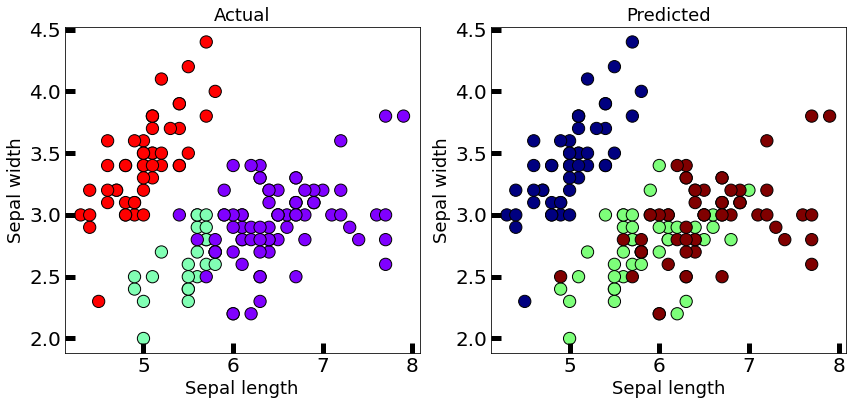

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['sepal length'], y=df['sepal width'], c=y, cmap='rainbow',edgecolor='k', s=150) #you can also try cmap='rainbow'
axes[1].scatter(x=df['sepal length'], y=df['sepal width'], c=iris.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [97]:
from sklearn.metrics import silhouette_score
print("The silhouette score is :")
silhouette_score(x, birch.labels_)

The silhouette score is :


0.5019524848046075

In [98]:
from sklearn.metrics import calinski_harabasz_score
print("The calinski harabasz score is :")
calinski_harabasz_score(x, birch.labels_)

The calinski harabasz score is :


458.47251055625765

In [99]:
from sklearn.metrics import davies_bouldin_score
print("The davies bouldin score is :")
davies_bouldin_score(x, birch.labels_)

The davies bouldin score is :


0.6258305924331691

## WINE DATASET

In [100]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine

In [101]:
wine=load_wine()   #loading iris dataset from sklearn.datasets
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [102]:
x=wine.data

In [103]:
df=pd.DataFrame(data=wine.data, columns=['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Text(0, 0.5, 'malic_acid')

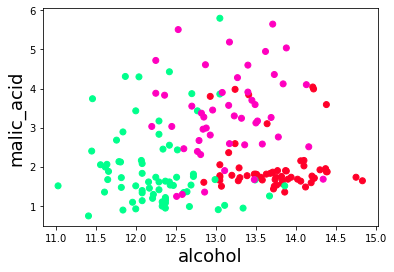

In [104]:
plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=wine.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('alcohol', fontsize=18)
plt.ylabel('malic_acid', fontsize=18)

In [105]:
from sklearn.cluster import Birch

birch = Birch(n_clusters=3, compute_labels=True, branching_factor=50)
y = birch.fit_predict(x)

In [106]:
print("Cluster Labels")
print(cluster.labels_)

Cluster Labels
[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 0 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]


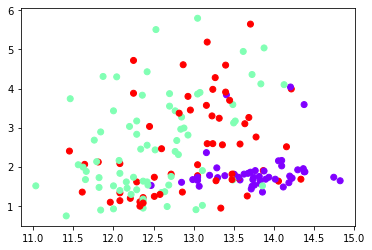

In [107]:
plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=birch.labels_, cmap='rainbow') #try using cmap='rainbow'
plt.show()


Text(0.5, 1.0, 'Predicted')

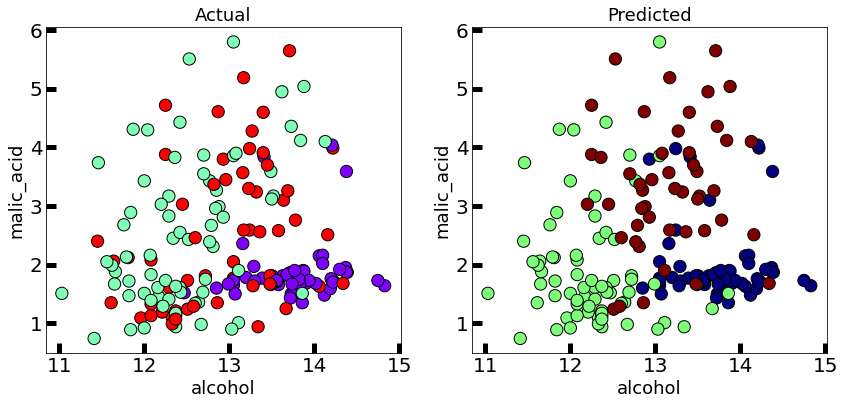

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['alcohol'], y=df['malic_acid'], c=y, cmap='rainbow',edgecolor='k', s=150) #you can also try cmap='rainbow'
axes[1].scatter(x=df['alcohol'], y=df['malic_acid'], c=wine.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('alcohol', fontsize=18)
axes[0].set_ylabel('malic_acid', fontsize=18)
axes[1].set_xlabel('alcohol', fontsize=18)
axes[1].set_ylabel('malic_acid', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [109]:
from sklearn.metrics import silhouette_score
print("The silhouette score is :")
silhouette_score(x, birch.labels_)

The silhouette score is :


0.5644796401732074

In [110]:
from sklearn.metrics import calinski_harabasz_score
print("The calinski harabasz score is :")
calinski_harabasz_score(x, birch.labels_)

The calinski harabasz score is :


552.851711505718

In [111]:
from sklearn.metrics import davies_bouldin_score
print("The davies bouldin score is :")
davies_bouldin_score(x, birch.labels_)

The davies bouldin score is :


0.5357343073560216

# ***Density based: DBSCAN***

## IRIS PLANT DATASET

In [112]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [113]:
iris=load_iris()   #loading iris dataset from sklearn.datasets
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [114]:
df=pd.DataFrame(data=iris.data, columns=['sepal length','sepal width','petal length','petal width'])
df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [115]:
x=iris.data

Text(0, 0.5, 'Sepal length')

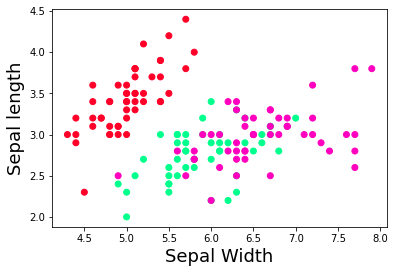

In [116]:
plt.scatter(x=df['sepal length'], y=df['sepal width'] ,c=iris.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Sepal length', fontsize=18)

In [117]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, algorithm='auto', metric='euclidean')
y = dbscan.fit_predict(x)

In [118]:
print("Cluster Labels")
print(dbscan.labels_)

Cluster Labels
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


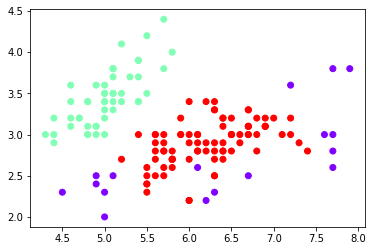

In [119]:
plt.scatter(x=df['sepal length'], y=df['sepal width'] ,c=dbscan.labels_, cmap='rainbow') #try using cmap='rainbow'
plt.show()

Text(0.5, 1.0, 'Predicted')

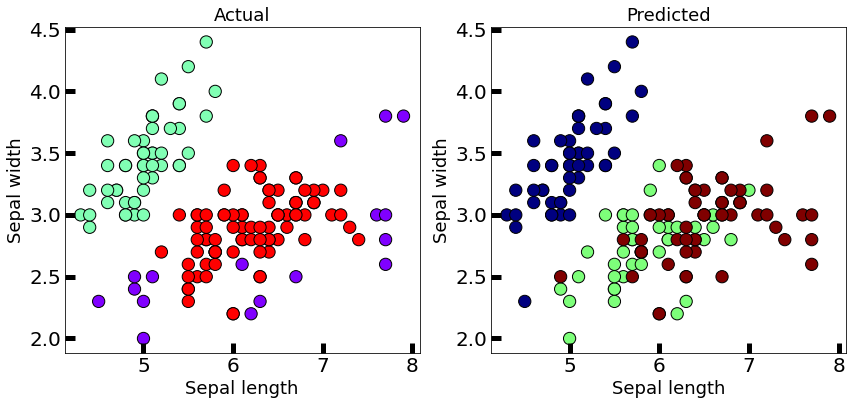

In [120]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['sepal length'], y=df['sepal width'], c=y, cmap='rainbow',edgecolor='k', s=150) #you can also try cmap='rainbow'
axes[1].scatter(x=df['sepal length'], y=df['sepal width'], c=iris.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [121]:
from sklearn.metrics import silhouette_score
print("The silhouette score is :")
silhouette_score(x, dbscan.labels_)

The silhouette score is :


0.48603419703456835

In [122]:
from sklearn.metrics import calinski_harabasz_score
print("The calinski harabasz score is :")
calinski_harabasz_score(x, dbscan.labels_)

The calinski harabasz score is :


220.29751498443005

In [123]:
from sklearn.metrics import davies_bouldin_score
print("The davies bouldin score is :")
davies_bouldin_score(x, dbscan.labels_)

The davies bouldin score is :


7.222448016359586

## WINE DATASET

In [124]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine

In [125]:
wine=load_wine()   #loading iris dataset from sklearn.datasets
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [126]:
x=wine.data

Text(0, 0.5, 'malic_acid')

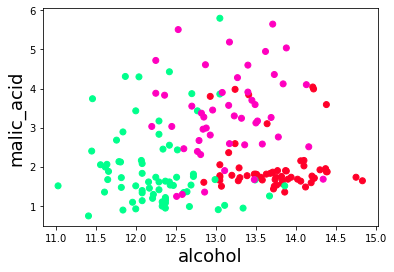

In [127]:
df=pd.DataFrame(data=wine.data, columns=['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'])
df

plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=wine.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('alcohol', fontsize=18)
plt.ylabel('malic_acid', fontsize=18)

In [128]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=35, algorithm='auto', metric='euclidean')
y = dbscan.fit_predict(x)

In [129]:
print("Cluster Labels")
print(dbscan.labels_)

Cluster Labels
[ 0  0 -1 -1  1 -1  2  2  0  0 -1  2  2  0 -1  2  2  0 -1  3  1  1  0  0
  3  3 -1  2  3  0  2 -1  0  2  0  3  3  0  0  1  1  0  0  1  3  0  0  0
  0  2  0  2 -1 -1  0  0  0  2  2  1  1  1  1  1  1  1  1  1  1 -1  3  1
  1 -1  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  3  3  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  3  3  1]


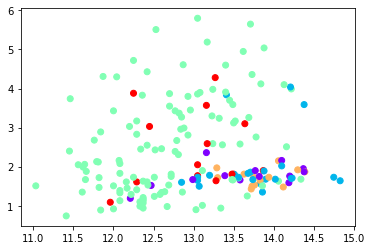

In [130]:
plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=dbscan.labels_, cmap='rainbow') #try using cmap='rainbow'
plt.show()

Text(0.5, 1.0, 'Predicted')

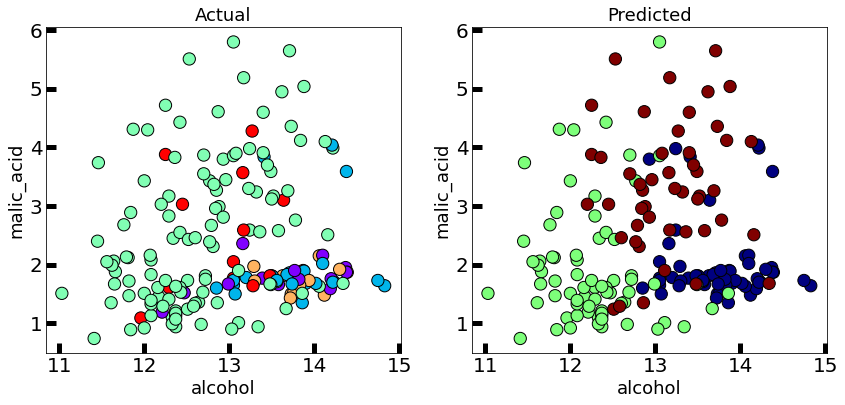

In [131]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['alcohol'], y=df['malic_acid'], c=y, cmap='rainbow',edgecolor='k', s=150) #you can also try cmap='rainbow'
axes[1].scatter(x=df['alcohol'], y=df['malic_acid'], c=wine.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('alcohol', fontsize=18)
axes[0].set_ylabel('malic_acid', fontsize=18)
axes[1].set_xlabel('alcohol', fontsize=18)
axes[1].set_ylabel('malic_acid', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [132]:
from sklearn.metrics import silhouette_score
print("The silhouette score is :")
silhouette_score(x, dbscan.labels_)

The silhouette score is :


0.4413295944891938

In [133]:
from sklearn.metrics import calinski_harabasz_score
print("The calinski harabasz score is :")
calinski_harabasz_score(x, dbscan.labels_)

The calinski harabasz score is :


208.9449395725058

In [134]:
from sklearn.metrics import davies_bouldin_score
print("The davies bouldin score is :")
davies_bouldin_score(x, dbscan.labels_)

The davies bouldin score is :


7.812129203041904

# ***Density based: OPTICS***

## IRIS PLANT DATASET

Text(0, 0.5, 'Sepal length')

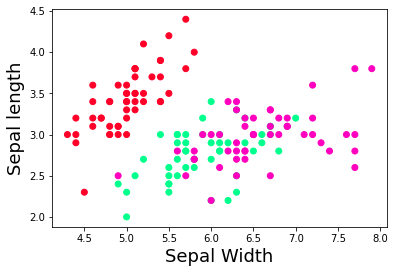

In [135]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris=load_iris()   #loading iris dataset from sklearn.datasets
iris

df=pd.DataFrame(data=iris.data, columns=['sepal length','sepal width','petal length','petal width'])
df

x=iris.data

plt.scatter(x=df['sepal length'], y=df['sepal width'] ,c=iris.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Sepal length', fontsize=18)

In [136]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, algorithm='auto', metric='euclidean')
y = dbscan.fit_predict(x)

In [137]:
print("Cluster Labels")
print(dbscan.labels_)

Cluster Labels
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


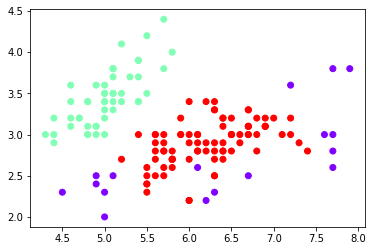

In [138]:
plt.scatter(x=df['sepal length'], y=df['sepal width'] ,c=dbscan.labels_, cmap='rainbow') #try using cmap='rainbow'
plt.show()

Text(0.5, 1.0, 'Predicted')

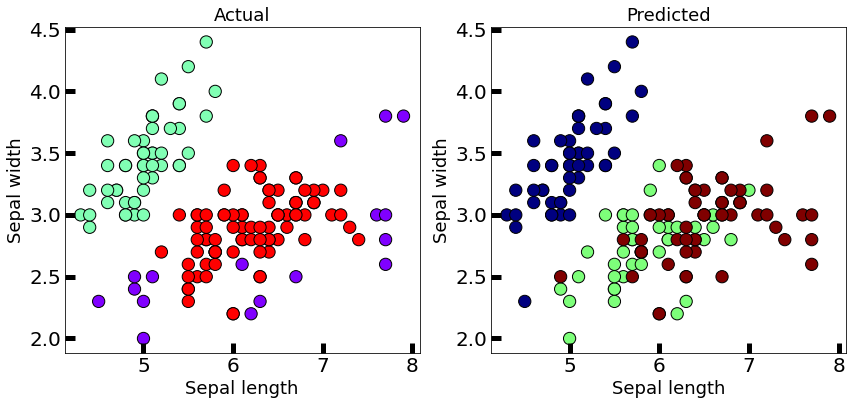

In [139]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['sepal length'], y=df['sepal width'], c=y, cmap='rainbow',edgecolor='k', s=150) #you can also try cmap='rainbow'
axes[1].scatter(x=df['sepal length'], y=df['sepal width'], c=iris.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [140]:
from sklearn.metrics import silhouette_score
print("The silhouette score is :")
silhouette_score(x, dbscan.labels_)

The silhouette score is :


0.48603419703456835

In [141]:
from sklearn.metrics import calinski_harabasz_score
print("The calinski harabasz score is :")
calinski_harabasz_score(x, dbscan.labels_)

The calinski harabasz score is :


220.29751498443005

In [142]:
from sklearn.metrics import davies_bouldin_score
print("The davies bouldin score is :")
davies_bouldin_score(x, dbscan.labels_)

The davies bouldin score is :


7.222448016359586

## WINE DATASET

In [143]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine

Text(0, 0.5, 'malic_acid')

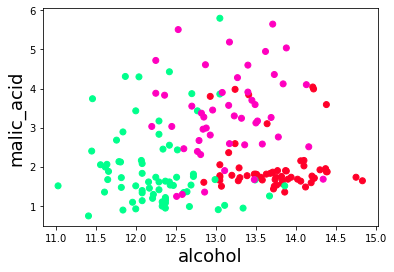

In [144]:
wine=load_wine()   #loading iris dataset from sklearn.datasets
wine

x=wine.data

df=pd.DataFrame(data=wine.data, columns=['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'])
df

plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=wine.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('alcohol', fontsize=18)
plt.ylabel('malic_acid', fontsize=18)

In [145]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=35, algorithm='auto', metric='euclidean')
y = dbscan.fit_predict(x)

In [146]:
print("Cluster Labels")
print(dbscan.labels_)


Cluster Labels
[ 0  0 -1 -1  1 -1  2  2  0  0 -1  2  2  0 -1  2  2  0 -1  3  1  1  0  0
  3  3 -1  2  3  0  2 -1  0  2  0  3  3  0  0  1  1  0  0  1  3  0  0  0
  0  2  0  2 -1 -1  0  0  0  2  2  1  1  1  1  1  1  1  1  1  1 -1  3  1
  1 -1  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  3  3  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  3  3  1]


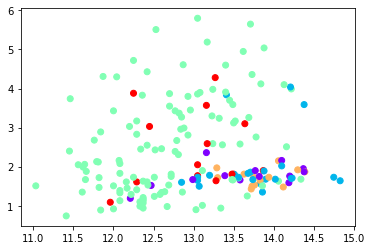

In [147]:
plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=dbscan.labels_, cmap='rainbow') #try using cmap='rainbow'
plt.show()


Text(0.5, 1.0, 'Predicted')

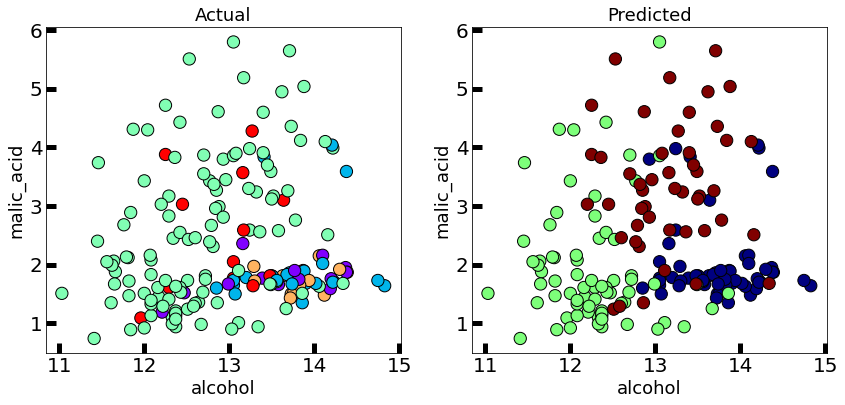

In [148]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['alcohol'], y=df['malic_acid'], c=y, cmap='rainbow',edgecolor='k', s=150) #you can also try cmap='rainbow'
axes[1].scatter(x=df['alcohol'], y=df['malic_acid'], c=wine.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('alcohol', fontsize=18)
axes[0].set_ylabel('malic_acid', fontsize=18)
axes[1].set_xlabel('alcohol', fontsize=18)
axes[1].set_ylabel('malic_acid', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [149]:
from sklearn.metrics import silhouette_score
print("The silhouette score is :")
silhouette_score(x, dbscan.labels_)

The silhouette score is :


0.4413295944891938

In [150]:
from sklearn.metrics import calinski_harabasz_score
print("The calinski harabasz score is :")
calinski_harabasz_score(x, dbscan.labels_)

The calinski harabasz score is :


208.9449395725058

In [151]:
from sklearn.metrics import davies_bouldin_score
print("The davies bouldin score is :")
davies_bouldin_score(x, dbscan.labels_)

The davies bouldin score is :


7.812129203041904

# ***K-means++***

## IRIS PLANT DATASET

Text(0, 0.5, 'Sepal length')

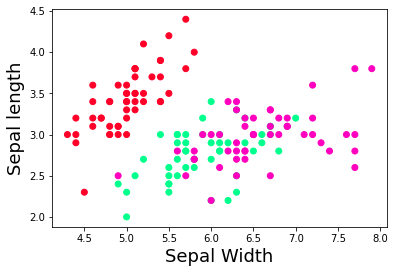

In [168]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris=load_iris()   #loading iris dataset from sklearn.datasets
iris

df=pd.DataFrame(data=iris.data, columns=['sepal length','sepal width','petal length','petal width'])
df

x=iris.data

plt.scatter(x=df['sepal length'], y=df['sepal width'] ,c=iris.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Sepal length', fontsize=18)

In [169]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10, max_iter=300, random_state=42)
y = kmeans.fit_predict(x)


print("K-Means Cluster Centers")
print(kmeans.cluster_centers_)
print("Cluster Labels")
print(kmeans.labels_)

K-Means Cluster Centers
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
Cluster Labels
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


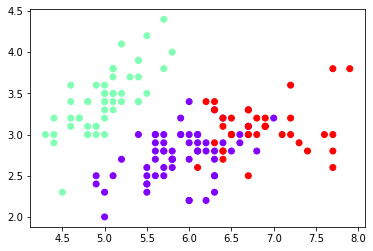

In [170]:
plt.scatter(x=df['sepal length'], y=df['sepal width'] ,c=kmeans.labels_, cmap='rainbow') #try using cmap='rainbow'
plt.show()


Text(0.5, 1.0, 'Predicted')

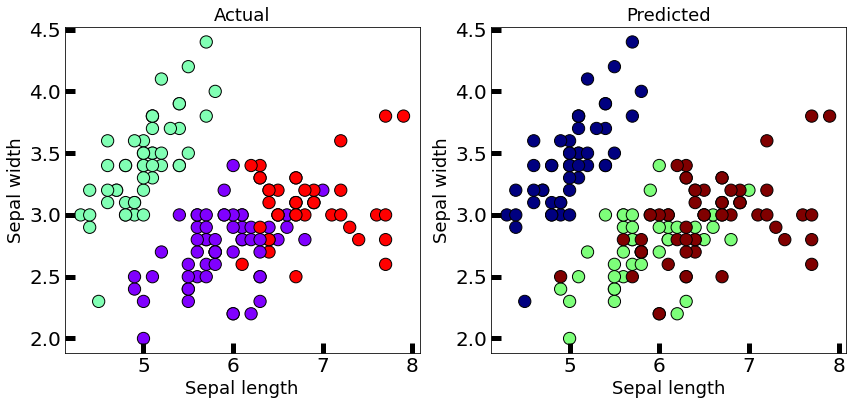

In [171]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['sepal length'], y=df['sepal width'], c=y, cmap='rainbow',edgecolor='k', s=150) #you can also try cmap='rainbow'
axes[1].scatter(x=df['sepal length'], y=df['sepal width'], c=iris.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [172]:
from sklearn.metrics import silhouette_score
print("The silhouette score is :")
silhouette_score(x, kmeans.labels_)

The silhouette score is :


0.5528190123564091

In [173]:
from sklearn.metrics import calinski_harabasz_score
print("The calinski harabasz score is :")
calinski_harabasz_score(x, kmeans.labels_)

The calinski harabasz score is :


561.62775662962

In [174]:
from sklearn.metrics import davies_bouldin_score
print("The davies bouldin score is :")
davies_bouldin_score(x, kmeans.labels_)

The davies bouldin score is :


0.6619715465007511

In [175]:
print("It is observed that TSS=SSE+SSB is a constant. Hence we will calculate the TSS ans substract SSE from it to get SSB")

print("The value of SSE is: ")
print(kmeans.inertia_)



# Finding the overall centroid of the data points
centers = kmeans.cluster_centers_
center_x = []
for center in centers:
  center_x.append(center[0])
center_x
overall_center = sum(center_x)/len(center_x)

tss = 0
for i in range(len(df)):
  a = df.iloc[i][0] - overall_center
  b = pow(a,2)
  tss = tss+b



print("The value of SSB is: ")
print(tss - kmeans.inertia_)

It is observed that TSS=SSE+SSB is a constant. Hence we will calculate the TSS ans substract SSE from it to get SSB
The value of SSE is: 
78.85144142614601
The value of SSB is: 
24.18035246910202


## WINE DATASET

Text(0, 0.5, 'malic_acid')

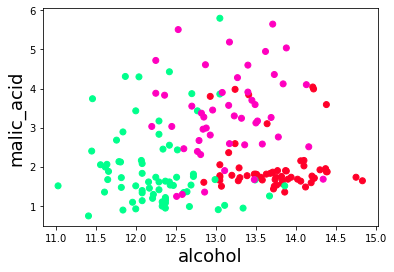

In [176]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine


wine=load_wine()   #loading iris dataset from sklearn.datasets
wine

x=wine.data

df=pd.DataFrame(data=wine.data, columns=['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'])
df

plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=wine.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('alcohol', fontsize=18)
plt.ylabel('malic_acid', fontsize=18)

In [177]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10, max_iter=300, random_state=42)
y = kmeans.fit_predict(x)


print("K-Means Cluster Centers")
print(kmeans.cluster_centers_)
print("Cluster Labels")
print(kmeans.labels_)

K-Means Cluster Centers
[[1.29298387e+01 2.50403226e+00 2.40806452e+00 1.98903226e+01
  1.03596774e+02 2.11112903e+00 1.58403226e+00 3.88387097e-01
  1.50338710e+00 5.65032258e+00 8.83967742e-01 2.36548387e+00
  7.28338710e+02]
 [1.38044681e+01 1.88340426e+00 2.42617021e+00 1.70234043e+01
  1.05510638e+02 2.86723404e+00 3.01425532e+00 2.85319149e-01
  1.91042553e+00 5.70255319e+00 1.07829787e+00 3.11404255e+00
  1.19514894e+03]
 [1.25166667e+01 2.49420290e+00 2.28855072e+00 2.08231884e+01
  9.23478261e+01 2.07072464e+00 1.75840580e+00 3.90144928e-01
  1.45188406e+00 4.08695651e+00 9.41159420e-01 2.49072464e+00
  4.58231884e+02]]
Cluster Labels
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2

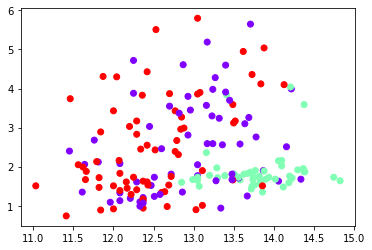

In [178]:
plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=kmeans.labels_, cmap='rainbow') #try using cmap='rainbow'
plt.show()

Text(0.5, 1.0, 'Predicted')

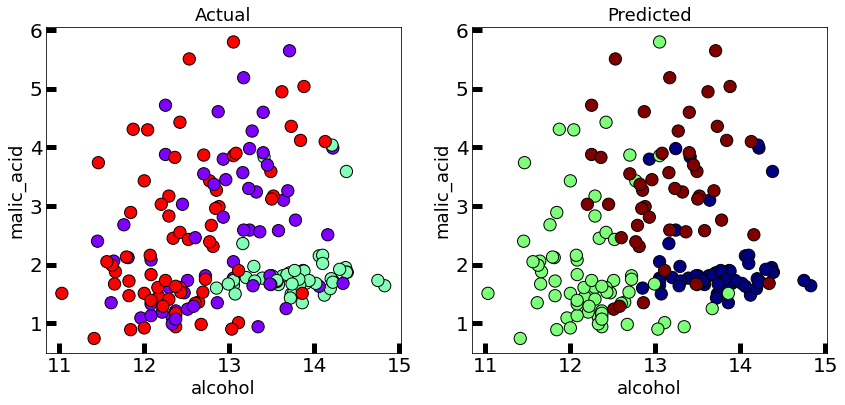

In [179]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['alcohol'], y=df['malic_acid'], c=y, cmap='rainbow',edgecolor='k', s=150) #you can also try cmap='rainbow'
axes[1].scatter(x=df['alcohol'], y=df['malic_acid'], c=wine.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('alcohol', fontsize=18)
axes[0].set_ylabel('malic_acid', fontsize=18)
axes[1].set_xlabel('alcohol', fontsize=18)
axes[1].set_ylabel('malic_acid', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [180]:
from sklearn.metrics import silhouette_score
print("The silhouette score is :")
silhouette_score(x, kmeans.labels_)

The silhouette score is :


0.5711381937868844

In [181]:
from sklearn.metrics import calinski_harabasz_score
print("The calinski harabasz score is :")
calinski_harabasz_score(x, kmeans.labels_)

The calinski harabasz score is :


561.815657860671

In [182]:
from sklearn.metrics import davies_bouldin_score
print("The davies bouldin score is :")
davies_bouldin_score(x, kmeans.labels_)

The davies bouldin score is :


0.5342431775436273

In [183]:
print("It is observed that TSS=SSE+SSB is a constant. Hence we will calculate the TSS ans substract SSE from it to get SSB")

print("The value of SSE is: ")
print(kmeans.inertia_)



# Finding the overall centroid of the data points
centers = kmeans.cluster_centers_
center_x = []
for center in centers:
  center_x.append(center[0])
center_x
overall_center = sum(center_x)/len(center_x)

tss = 0
for i in range(len(df)):
  a = df.iloc[i][0] - overall_center
  b = pow(a,2)
  tss = tss+b



print("The value of SSB is: ")
print(tss - kmeans.inertia_)


It is observed that TSS=SSE+SSB is a constant. Hence we will calculate the TSS ans substract SSE from it to get SSB
The value of SSE is: 
2370689.686782968
The value of SSB is: 
-2370571.8053313834


# ***Bisecting K-means***

## IRIS PLANT DATASET

In [184]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris



Text(0, 0.5, 'Sepal length')

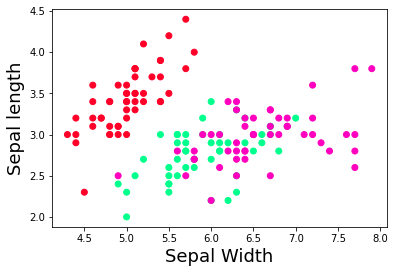

In [185]:
iris=load_iris()   #loading iris dataset from sklearn.datasets
iris

df=pd.DataFrame(data=iris.data, columns=['sepal length','sepal width','petal length','petal width'])
df

x=iris.data

plt.scatter(x=df['sepal length'], y=df['sepal width'] ,c=iris.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Sepal length', fontsize=18)

In [186]:
from sklearn.cluster import KMeans
import numpy as np

K = 2
current_clusters = 1
split = 0
while current_clusters != K:
    kmeans = KMeans(n_clusters=2).fit(x)
    current_clusters += 1
    split += 1
    cluster_centers = kmeans.cluster_centers_
    sse = [0]*2
    for point, label in zip(x, kmeans.labels_):
        sse[label] += np.square(point-cluster_centers[label]).sum()
    chosen_cluster = np.argmax(sse, axis=0)
    chosen_cluster_data = x[kmeans.labels_ == chosen_cluster]
    x = chosen_cluster_data

In [187]:
print("K-Means Cluster Centers")
print(kmeans.cluster_centers_)
print("Cluster Labels")
print(kmeans.labels_)

K-Means Cluster Centers
[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36981132 1.56037736 0.29056604]]
Cluster Labels
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


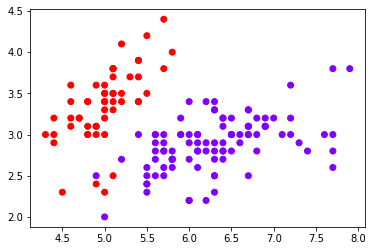

In [188]:
plt.scatter(x=df['sepal length'], y=df['sepal width'] ,c=kmeans.labels_, cmap='rainbow') #try using cmap='rainbow'
plt.show()

Text(0.5, 1.0, 'Predicted')

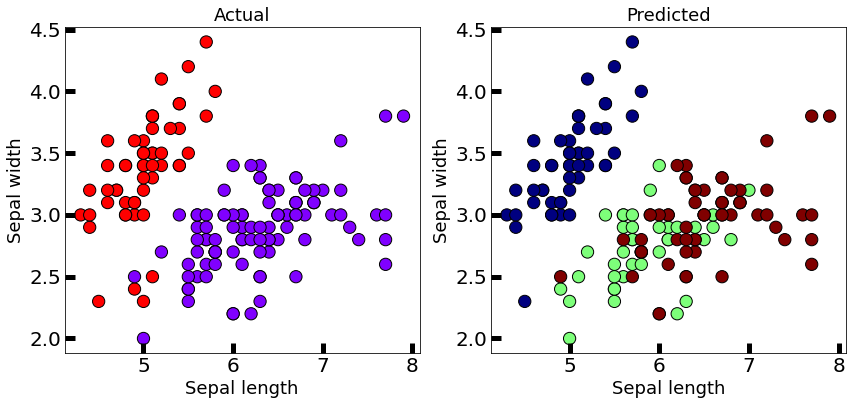

In [189]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['sepal length'], y=df['sepal width'], c=kmeans.labels_, cmap='rainbow',edgecolor='k', s=150) #you can also try cmap='rainbow'
axes[1].scatter(x=df['sepal length'], y=df['sepal width'], c=iris.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [190]:
from sklearn.metrics import silhouette_score
print("The silhouette score is :")
silhouette_score(x, kmeans.labels_[0:97])

The silhouette score is :


0.3093066204565962

In [191]:
from sklearn.metrics import calinski_harabasz_score
print("The calinski harabasz score is :")
calinski_harabasz_score(x, kmeans.labels_[0:97])

The calinski harabasz score is :


61.177251757411454

In [192]:
from sklearn.metrics import davies_bouldin_score
print("The davies bouldin score is :")
davies_bouldin_score(x, kmeans.labels_[0:97])

The davies bouldin score is :


1.0999710250083434

In [193]:

print("It is observed that TSS=SSE+SSB is a constant. Hence we will calculate the TSS ans substract SSE from it to get SSB")

print("The value of SSE is: ")
print(kmeans.inertia_)



# Finding the overall centroid of the data points
centers = kmeans.cluster_centers_
center_x = []
for center in centers:
  center_x.append(center[0])
center_x
overall_center = sum(center_x)/len(center_x)

tss = 0
for i in range(len(df)):
  a = df.iloc[i][0] - overall_center
  b = pow(a,2)
  tss = tss+b



print("The value of SSB is: ")
print(tss - kmeans.inertia_)

It is observed that TSS=SSE+SSB is a constant. Hence we will calculate the TSS ans substract SSE from it to get SSB
The value of SSE is: 
152.34795176035792
The value of SSB is: 
-44.76532060227591


## WINE DATASET

Text(0, 0.5, 'malic_acid')

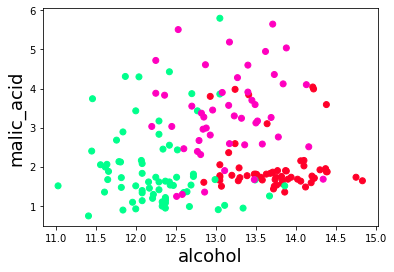

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine


wine=load_wine()   #loading iris dataset from sklearn.datasets
wine

x=wine.data

df=pd.DataFrame(data=wine.data, columns=['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'])
df

plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=wine.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('alcohol', fontsize=18)
plt.ylabel('malic_acid', fontsize=18)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

K = 2
current_clusters = 1
split = 0
while current_clusters != K:
    kmeans = KMeans(n_clusters=2).fit(x)
    current_clusters += 1
    split += 1
    cluster_centers = kmeans.cluster_centers_
    sse = [0]*2
    for point, label in zip(x, kmeans.labels_):
        sse[label] += np.square(point-cluster_centers[label]).sum()
    chosen_cluster = np.argmax(sse, axis=0)
    chosen_cluster_data = x[kmeans.labels_ == chosen_cluster]
    x = chosen_cluster_data

In [ ]:

print("K-Means Cluster Centers")
print(kmeans.cluster_centers_)
print("Cluster Labels")
print(kmeans.labels_)

K-Means Cluster Centers
[[1.36665455e+01 1.87072727e+00 2.42781818e+00 1.74527273e+01
  1.06290909e+02 2.81618182e+00 2.89654545e+00 2.92909091e-01
  1.89690909e+00 5.52036364e+00 1.06665455e+00 3.06672727e+00
  1.15172727e+03]
 [1.27028455e+01 2.54455285e+00 2.33910569e+00 2.04081301e+01
  9.68130081e+01 2.06211382e+00 1.64146341e+00 3.92682927e-01
  1.45406504e+00 4.85138211e+00 9.08617886e-01 2.40821138e+00
  5.65869919e+02]]
Cluster Labels
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


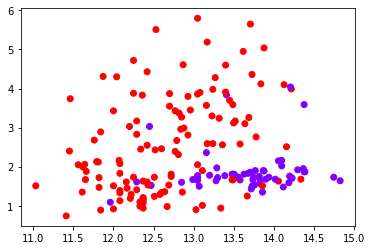

In [ ]:

plt.scatter(x=df['alcohol'], y=df['malic_acid'] ,c=kmeans.labels_, cmap='rainbow') #try using cmap='rainbow'
plt.show()

Text(0.5, 1.0, 'Predicted')

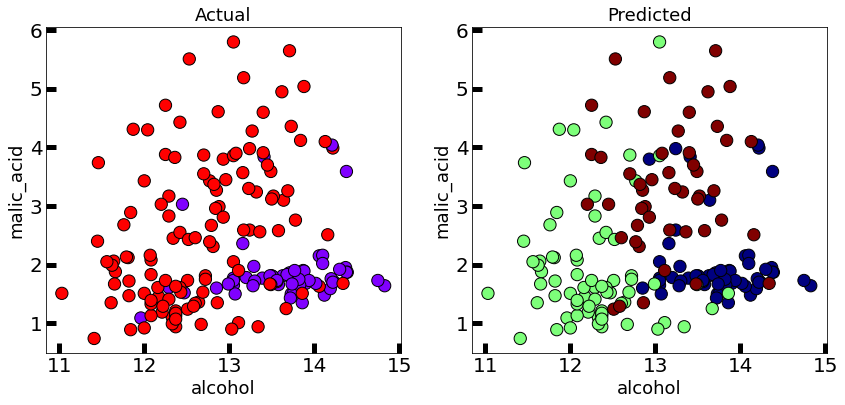

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['alcohol'], y=df['malic_acid'], c=kmeans.labels_, cmap='rainbow',edgecolor='k', s=150) #you can also try cmap='rainbow'
axes[1].scatter(x=df['alcohol'], y=df['malic_acid'], c=wine.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('alcohol', fontsize=18)
axes[0].set_ylabel('malic_acid', fontsize=18)
axes[1].set_xlabel('alcohol', fontsize=18)
axes[1].set_ylabel('malic_acid', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [ ]:
from sklearn.metrics import silhouette_score
print("The silhouette score is :")
silhouette_score(x, kmeans.labels_[0:123])

The silhouette score is :


0.003840256949844042

In [ ]:
from sklearn.metrics import calinski_harabasz_score
print("The calinski harabasz score is :")
calinski_harabasz_score(x, kmeans.labels_[0:123])

The calinski harabasz score is :


1.0661966700358758

In [ ]:
from sklearn.metrics import davies_bouldin_score
print("The davies bouldin score is :")
davies_bouldin_score(x, kmeans.labels_[0:123])

The davies bouldin score is :


9.045634694626461

In [ ]:
print("It is observed that TSS=SSE+SSB is a constant. Hence we will calculate the TSS ans substract SSE from it to get SSB")

print("The value of SSE is: ")
print(kmeans.inertia_)



# Finding the overall centroid of the data points
centers = kmeans.cluster_centers_
center_x = []
for center in centers:
  center_x.append(center[0])
center_x
overall_center = sum(center_x)/len(center_x)

tss = 0
for i in range(len(df)):
  a = df.iloc[i][0] - overall_center
  b = pow(a,2)
  tss = tss+b



print("The value of SSB is: ")
print(tss - kmeans.inertia_)


It is observed that TSS=SSE+SSB is a constant. Hence we will calculate the TSS ans substract SSE from it to get SSB
The value of SSE is: 
4543749.614531862
The value of SSB is: 
-4543626.9290532945
